In [16]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
from matplotlib.collections import LineCollection
import os
from sklearn.model_selection import KFold
from utils.color_map import *

In [17]:
path = 'Z:/0-FJQ/results/nsyb-G7f-rAch1h-more-odorant/20240808-fly1/voxel-integration-region-SRD-long-formal-y-odor1-3/channel_0_pca_thresh_0.9_block_size_0.1_odor_choice_0_downsample/No_Shuffle'
filename = 'testing_set_expr_thresh_0.18_fold_5.npy'
fig_save_path = path+'/manifold_single'
fig_save_prefix = 'manifold_20240808-fly1_c0_'+filename[:-4]
cv_fold = 5
if_save = False
if if_save:
    figure_save_path = fig_save_path 
    f = os.path.exists(figure_save_path)
    if not f:
        os.makedirs(figure_save_path)

data = np.load(os.path.abspath(path + '/' + filename))
print(np.shape(data))
stim_file_name = 'stim.npy'
stim = np.load(path + '/' + stim_file_name)
print(np.shape(stim))
# select timepoints
data = data[0:43,:,:]

(43, 12, 2)
(60,)


In [18]:
num_trial = len(stim)
kf = KFold(n_splits=cv_fold,shuffle = True,random_state = 5)
list_train = []
list_test = []
for train, test in kf.split(np.linspace(0,num_trial-1,num_trial)):
    list_train.append(train)
    list_test.append(test)
list_train = np.array(list_train)
list_test = np.array(list_test)

In [19]:
if data.ndim==2:
    stim_flag = stim
    data = data.reshape((int(np.size(data,0)/num_trial),num_trial,-1),order = 'F')
    data = data[:,:,[0,1]]###
    trial_flag = range(180)
    num_tp = np.size(data,0)
else:
    number = int(filename[-5:-4])-1
    flag = filename[0:4]
    if flag == 'test':
        stim_flag = stim[list_test[number]]
        trial_flag = list_test[number]
    else:
        stim_flag = stim[list_train[number]]
        trial_flag = list_train[number]
    num_tp = np.size(data,0)
print(np.shape(data))
print(np.shape(stim_flag))

(43, 12, 2)
(12,)


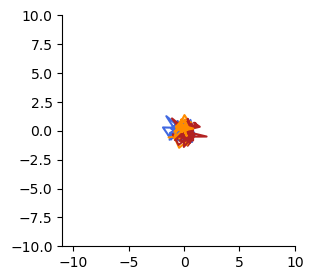

In [20]:
# plot-1 color-stim
color_list = ['royalblue','firebrick','darkorange']
label = ['OCT','MCH','EA']
plt.figure(figsize=(3,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
cnt = [0,0,0]
for i in range(np.size(data,1)):
    plt.plot(data[:,i,0],data[:,i,1],c = color_list[stim_flag[i]-1],label = label[stim_flag[i]-1],linewidth=1.5)
    cnt[stim_flag[i]-1] = cnt[stim_flag[i]-1]+1
    if cnt[0]==1 and cnt[1]==1 and cnt[2]==1:
        plt.legend(loc = 4)
# ax.set_xlim(np.min(data[:,:,0])-0.1*abs(np.min(data[:,:,0])), np.max(data[:,:,0])+0.1*abs(np.max(data[:,:,0])))
# ax.set_ylim(np.min(data[:,:,1])-0.1*abs(np.min(data[:,:,1])), np.max(data[:,:,1])+0.1*abs(np.max(data[:,:,1])))
ax.set_xlim(-11,10)
ax.set_ylim(-10,10)
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(fig_save_path + '/' + '3D_'+ fig_save_prefix +'_stim.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(fig_save_path + '/' + '3D_'+ fig_save_prefix +'_stim.png',dpi = 300,bbox_inches = 'tight')
plt.show()

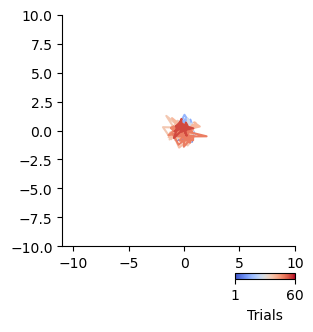

In [21]:
# plot-2 color-trial
color_list = plt.cm.coolwarm(np.linspace(0,1,num_trial))

fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
m = plt.subplot(1,1,1)
cnt = [0,0,0]
for i in range(np.size(data,1)):
    plt.plot(data[:,i,0],data[:,i,1],c = color_list[trial_flag[i]],linewidth=1.5)
# m.set_xlim(np.min(data[:,:,0])-0.1*abs(np.min(data[:,:,0])), np.max(data[:,:,0])+0.1*abs(np.max(data[:,:,0])))
# m.set_ylim(np.min(data[:,:,1])-0.1*abs(np.min(data[:,:,1])), np.max(data[:,:,1])+0.1*abs(np.max(data[:,:,1])))
ax.set_xlim(-11,10)
ax.set_ylim(-10,10)
fig.subplots_adjust(bottom=0.108)

#colorbar
l = 0.7
b = 0
w = 0.2
h = 0.02 
rect = [l,b,w,h] 
cbar_ax = fig.add_axes(rect) 
cmap1 = copy.copy(mpl.cm.coolwarm)
norm1 = mpl.colors.Normalize(vmin=1, vmax=num_trial)
im1 = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap1)
cbar1 = plt.colorbar(
    im1, orientation='horizontal',
    ticks=np.linspace(1, num_trial, 2),
    label='Trials',cax=cbar_ax)
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(fig_save_path + '/' + '3D_'+ fig_save_prefix +'_trial.png',dpi = 300,bbox_inches = 'tight')
    plt.savefig(fig_save_path + '/' + '3D_'+ fig_save_prefix +'_trial.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()

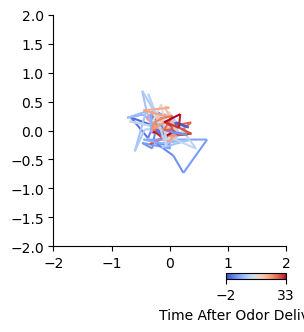

In [22]:
kf = KFold(n_splits=cv_fold,shuffle = True,random_state = 5)
flag = 0
for train, test in kf.split(np.linspace(0,num_trial-1,num_trial)):
    if flag == int(filename[-5])-1:
        if filename[0:4]=='trai':
            stim_train = train
        else:
            stim_train = test
        break
    flag=flag+1
# plot-3 color-tp
fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
m = plt.subplot(1,1,1)
data_mean = np.zeros((np.size(data,0),3,np.size(data,2)))
for i in range(3):
    data_mean[:,i,:] = np.mean(data[:,stim[stim_train]==i+1,:],1)
    x1 = np.linspace(0,1,num_tp)
    y1 = data_mean[:,i,0]
    x2 = np.linspace(0,1,num_tp)
    y2 = data_mean[:,i,1]
    ps = np.stack((y1,y2), axis=1)
    segments = np.stack((ps[:-1], ps[1:]), axis=1)

    cmap = 'coolwarm'
    colors = color_map(x1[:-1], cmap)
    line_segments = LineCollection(segments, colors=colors, linewidths=1.5, linestyles='solid', cmap=cmap)
    m.add_collection(line_segments)
# m.set_xlim(np.min(data_mean[:,:,0])-0.1*abs(np.min(data_mean[:,:,0])), np.max(data_mean[:,:,0])+0.1*abs(np.max(data_mean[:,:,0])))
# m.set_ylim(np.min(data_mean[:,:,1])-0.1*abs(np.min(data_mean[:,:,1])), np.max(data_mean[:,:,1])+0.1*abs(np.max(data_mean[:,:,1])))
m.set_xlim(-2,2)
m.set_ylim(-2,2)
fig.subplots_adjust(bottom=0.108)

#colorbar
l = 0.7
b = 0
w = 0.2
h = 0.02 
rect = [l,b,w,h] 
cbar_ax = fig.add_axes(rect) 
cmap1 = copy.copy(mpl.cm.coolwarm)
norm1 = mpl.colors.Normalize(vmin=-2, vmax=33)
im1 = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap1)
cbar1 = plt.colorbar(
    im1, orientation='horizontal',
    ticks=np.linspace(-2,33, 2),
    label='Time After Odor Delivery (s)',cax=cbar_ax)
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(fig_save_path + '/' + '3D_'+ fig_save_prefix +'_tp_mean.png',dpi = 300,bbox_inches = 'tight')
    plt.savefig(fig_save_path + '/' + '3D_'+ fig_save_prefix +'_tp_mean.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()